In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [38]:
b= 0.023
zR = b/2
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus
PXe = 25

pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : b/2,             # [m] Rayleigh range
            'delta_k': 2/b,        #Phase matching
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9}     # [s] single pulse length

harm_params = {'alpha' : 1.5e-50,
            'chi3' : 1.5e-35,
            'PXe' : PXe}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params = {'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}


params = {**pulse_params, **harm_params, **sol_params}
initial_vals = (nonzero, nonzero)




sol = solve_diff_eq(curly_GBWA,params,zrange, initial_vals,z,r)


    

## Plot of Source Term

In [ ]:

Phi = np.zeros(len(z))
i =0
for zval in z:
    Phi[i] = evalPhi3(zval, zstart, params['delta_k'], params) #precomputes Phi 3 (interpolated in diff eq)
    i += 1

In [41]:
sourceTerm = lambda z: (1/2)*k118*params['chi3']*PXe*Torr_to_m3 * (omega0/beam_radius(z,params))**2 * (peak_amplitude_355(params)**3) \
                        * np.cos((params['delta_k']*z)-2*np.arctan2(2*z/b,1) + phi3_interp(z,Phi,params))

In [44]:
dk = params['delta_k']

simplifiedSourceTerm = lambda z: np.cos((dk*z)-2*np.arctan2(2*z/b,1) + phi3_interp(z,Phi,params))/(beam_radius(z,params)**2)

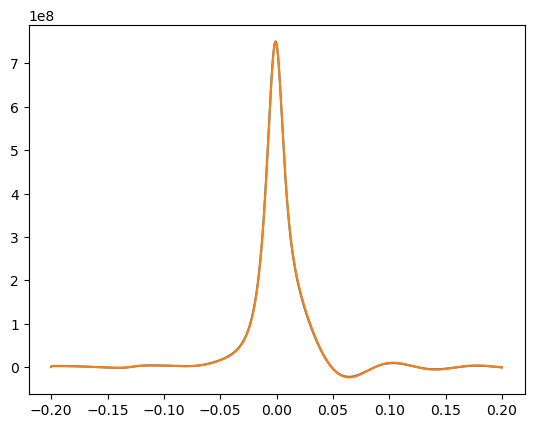

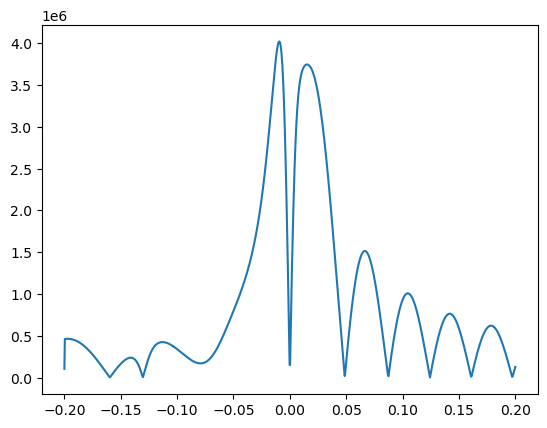

In [60]:
plt.plot(z,simplifiedSourceTerm(z))
plt.plot(z,np.exp(z)*simplifiedSourceTerm(z))
plt.show()
plt.plot(z,abs( simplifiedSourceTerm(z) - np.exp(z)*simplifiedSourceTerm(z) ) )

In [ ]:

Phi = np.zeros(len(z))
i =0
for zval in z:
    Phi[i] = evalPhi3(zval, zstart, params['delta_k'], params) #precomputes Phi 3 (interpolated in diff eq)
    i += 1

In [39]:
np.any(sol.beam_118.data <0)

False

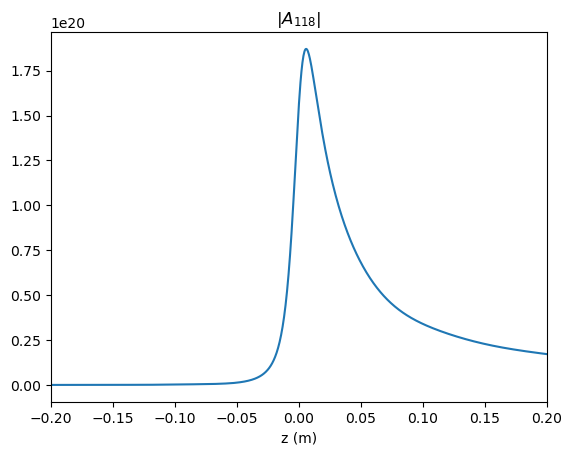

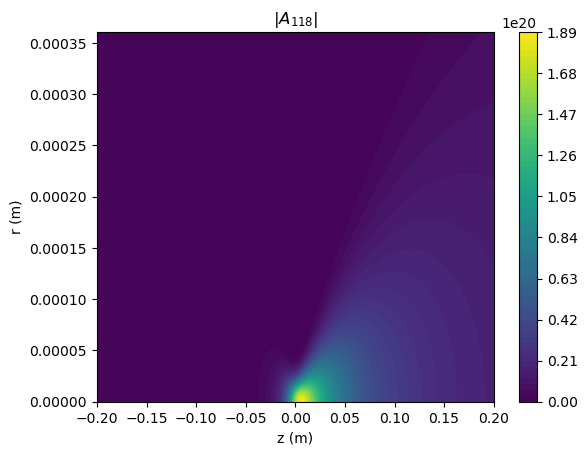

In [40]:
plt.plot(z,sol.beam_118.data[0])
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.title("$|A_{118}|$")
plt.show()


Z,R = np.meshgrid(z,r)
plt.contourf(Z,R,sol.beam_118.data,64)

plt.ylim(0,rstop)
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.ylabel('r (m)')
plt.title("$|A_{118}|$")
plt.colorbar()
plt.show()